### Some regional numbers of HT for different timescales


In [2]:
#Load required packages
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
from xgcm import Grid
import numpy as np
import pandas as pd
import cftime
import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature as cft
import sys, os
import warnings
warnings.simplefilter("ignore")
from dask.distributed import Client

from xhistogram.xarray import histogram


In [3]:
client = Client(n_workers=8)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/39579/status,
Dashboard: /proxy/39579/status,Workers: 8
Total threads: 16,Total memory: 250.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41901,Workers: 8
Dashboard: /proxy/39579/status,Total threads: 16
Started: Just now,Total memory: 250.00 GiB
Comm: tcp://127.0.0.1:35651,Total threads: 2
Dashboard: /proxy/44043/status,Memory: 31.25 GiB
Nanny: tcp://127.0.0.1:41571,


In [4]:
## load stuff for grid info

# files:
xch = 1440#*10#2*288
ych = 1080#*10#2*216

fgrd   = xr.open_dataset('/g/data/e14/cy8964/Post_Process/temp/ocean_grid.nc').chunk({'yt_ocean':ych/10,'yu_ocean':ych/10,'xt_ocean':xch/10,'xu_ocean':xch/10})
fwmass_m = xr.open_mfdataset('/g/data/e14/cy8964/Post_Process/temp/output000fwmass_m_copy.nc',combine='by_coords',chunks={'time': 1},decode_times = True).chunk({'time': 1,'grid_yt_ocean':ych/10,'grid_xt_ocean':xch/10})

# ---------------------------------------------------------------------------------- #

# Generate xgcm grid object:
gridwm = Grid(fwmass_m,coords={"x":{"center":"grid_xt_ocean","right":"grid_xu_ocean"},
                             "y":{"center":"grid_yt_ocean","right":"grid_yu_ocean"},
                             "T":{"center":"neutral","outer":"neutralrho_edges"}},periodic=False)
grid2 = Grid(fgrd,coords={"x":{"center":"xt_ocean","right":"xu_ocean"},
                             "y":{"center":"yt_ocean","right":"yu_ocean"}},periodic=False)

# ---------------------------------------------------------------------------------- #

# Some constants:
Cp = 3992.10322329649
rho0 = 1035
dT = (fwmass_m.neutral[1]-fwmass_m.neutral[0]).values

sc_daylength = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

area = fgrd.area_t.rename({'xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
dy = grid2.diff(fgrd.yu_ocean,'y',boundary='extend').rename({'yt_ocean':'grid_yt_ocean'})
dx = grid2.diff(fgrd.xu_ocean,'x',boundary='extend').rename({'xt_ocean':'grid_xt_ocean'})
dyt = grid2.diff(fgrd.yu_ocean,'y',boundary='extend')
dxt = grid2.diff(fgrd.xu_ocean,'x',boundary='extend')

### Load 3d (x,y,temp) data separated by timescale

In [5]:
# True_1year_means = xr.open_mfdataset('/g/data/e14/cy8964/Post_Process/temp/025deg_096_3d/True_1year_means_corrected.nc').chunk({'grid_yu_ocean':ych/10,'grid_yt_ocean':ych/10, 'grid_xt_ocean':xch/10})
# Mean_1year_means = xr.open_mfdataset('/g/data/e14/cy8964/Post_Process/temp/025deg_096_3d/Mean_1year_means.nc').chunk({'grid_yu_ocean':ych/10,'grid_yt_ocean':ych/10, 'grid_xt_ocean':xch/10})
# Twomo_mean_1year_means = xr.open_mfdataset('/g/data/e14/cy8964/Post_Process/temp/025deg_096_3d/2mo_mean_1year_means.nc').chunk({'grid_yu_ocean':ych/10,'grid_yt_ocean':ych/10, 'grid_xt_ocean':xch/10})
# Tenday_mean_1year_means = xr.open_mfdataset('/g/data/e14/cy8964/Post_Process/temp/025deg_096_3d/10day_mean_1year_means.nc').chunk({'grid_yu_ocean':ych/10,'grid_yt_ocean':ych/10, 'grid_xt_ocean':xch/10})
# Oneday_mean_1year_means = xr.open_mfdataset('/g/data/e14/cy8964/Post_Process/temp/025deg_096_3d/1day_mean_1year_means.nc').chunk({'grid_yu_ocean':ych/10,'grid_yt_ocean':ych/10,'grid_xt_ocean':xch/10})

True_10year_means = xr.open_mfdataset('/g/data/e14/cy8964/Post_Process/temp/025deg_10yr_3d/True_10year_means.nc')#.chunk({'grid_yu_ocean':ych/10,'grid_yt_ocean':ych/10, 'grid_xt_ocean':xch/10})
Mean_10year_means = xr.open_mfdataset('/g/data/e14/cy8964/Post_Process/temp/025deg_10yr_3d/Mean_10year_means.nc')#.chunk({'grid_yu_ocean':ych/10,'grid_yt_ocean':ych/10, 'grid_xt_ocean':xch/10})
Twomo_mean_10year_means = xr.open_mfdataset('/g/data/e14/cy8964/Post_Process/temp/025deg_10yr_3d/2mo_mean_10year_means.nc')#.chunk({'grid_yu_ocean':ych/10,'grid_yt_ocean':ych/10, 'grid_xt_ocean':xch/10})
sc_Twomo_mean_10year_means = xr.open_mfdataset('/g/data/e14/cy8964/Post_Process/temp/025deg_10yr_3d/sc_2mo_mean_10year_means.nc')#.chunk({'grid_yu_ocean':ych/10,'grid_yt_ocean':ych/10, 'grid_xt_ocean':xch/10})
Tenday_mean_10year_means = xr.open_mfdataset('/g/data/e14/cy8964/Post_Process/temp/025deg_10yr_3d/10day_mean_10year_means.nc')#.chunk({'grid_yu_ocean':ych/10,'grid_yt_ocean':ych/10, 'grid_xt_ocean':xch/10})
Oneday_mean_10year_means = xr.open_mfdataset('/g/data/e14/cy8964/Post_Process/temp/025deg_10yr_3d/1day_mean_10year_means.nc')#.chunk({'grid_yu_ocean':ych/10,'grid_yt_ocean':ych/10,'grid_xt_ocean':xch/10})


In [6]:
Psi = True_10year_means.Psi
Psi_mean_tot = Mean_10year_means.Psi
Psi_ac = (sc_Twomo_mean_10year_means - Mean_10year_means).Psi
Psi_lt = (Twomo_mean_10year_means - sc_Twomo_mean_10year_means).Psi

Psi_TIWs = (Tenday_mean_10year_means - Twomo_mean_10year_means).Psi
Psi_storm = (Oneday_mean_10year_means- Tenday_mean_10year_means).Psi
Psi_diurnal = (True_10year_means-Oneday_mean_10year_means).Psi

In [7]:
SF = True_10year_means.SF
SF_mean_tot = Mean_10year_means.SF
SF_ac = (sc_Twomo_mean_10year_means - Mean_10year_means).SF
SF_lt = (Twomo_mean_10year_means - sc_Twomo_mean_10year_means).SF

SF_TIWs = (Tenday_mean_10year_means - Twomo_mean_10year_means).SF
SF_storm = (Oneday_mean_10year_means- Tenday_mean_10year_means).SF
SF_diurnal = (True_10year_means-Oneday_mean_10year_means).SF

In [8]:
MX = True_10year_means.MX
MX_mean_tot = Mean_10year_means.MX
MX_ac = (sc_Twomo_mean_10year_means - Mean_10year_means).MX
MX_lt = (Twomo_mean_10year_means - sc_Twomo_mean_10year_means).MX

MX_TIWs = (Tenday_mean_10year_means - Twomo_mean_10year_means).MX
MX_storm = (Oneday_mean_10year_means- Tenday_mean_10year_means).MX
MX_diurnal = (True_10year_means-Oneday_mean_10year_means).MX

In [9]:
Hf = -Cp*rho0*dT*gridwm.cumsum(True_10year_means.Psi,'T',boundary="fill", fill_value=0)
Hf_mean_tot = -Cp*rho0*dT*gridwm.cumsum(Mean_10year_means.Psi,'T',boundary="fill", fill_value=0)
Hf_ac = -Cp*rho0*dT*gridwm.cumsum((sc_Twomo_mean_10year_means - Mean_10year_means).Psi,'T',boundary="fill", fill_value=0)
Hf_lt = -Cp*rho0*dT*gridwm.cumsum((Twomo_mean_10year_means - sc_Twomo_mean_10year_means).Psi,'T',boundary="fill", fill_value=0)

Hf_TIWs = -Cp*rho0*dT*gridwm.cumsum((Tenday_mean_10year_means - Twomo_mean_10year_means).Psi,'T',boundary="fill", fill_value=0)
Hf_storm = -Cp*rho0*dT*gridwm.cumsum((Oneday_mean_10year_means- Tenday_mean_10year_means).Psi,'T',boundary="fill", fill_value=0)
Hf_diurnal = -Cp*rho0*dT*gridwm.cumsum((True_10year_means-Oneday_mean_10year_means).Psi,'T',boundary="fill", fill_value=0)


In [10]:
SF_DHT = (SF.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean')
SF_DHT_mean_tot = (SF_mean_tot.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean')
SF_DHT_ac = (SF_ac.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean')
SF_DHT_lt = (SF_lt.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean')
SF_DHT_TIWs = (SF_TIWs.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean')
SF_DHT_storm = (SF_storm.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean')
SF_DHT_diurnal = (SF_diurnal.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean')

MX_DHT = (MX.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean')
MX_DHT_mean_tot = (MX_mean_tot.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean')
MX_DHT_ac = (MX_ac.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean')
MX_DHT_lt = (MX_lt.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean')
MX_DHT_TIWs = (MX_TIWs.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean')
MX_DHT_storm = (MX_storm.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean')
MX_DHT_diurnal = (MX_diurnal.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean')

MHT = (Hf.sum('grid_xt_ocean')/1.e15).isel(neutral=-1)
MHT_mean_tot = (Hf_mean_tot.sum('grid_xt_ocean')/1.e15).isel(neutral=-1)
MHT_ac = (Hf_ac.sum('grid_xt_ocean')/1.e15).isel(neutral=-1)
MHT_lt = (Hf_lt.sum('grid_xt_ocean')/1.e15).isel(neutral=-1)
MHT_TIWs = (Hf_TIWs.sum('grid_xt_ocean')/1.e15).isel(neutral=-1)
MHT_storm = (Hf_storm.sum('grid_xt_ocean')/1.e15).isel(neutral=-1)
MHT_diurnal = (Hf_diurnal.sum('grid_xt_ocean')/1.e15).isel(neutral=-1)


1. **Find contribution of Gulf Stream and Kuroshio to 2 months -- 10 years timescale HT**

2. **HT due to time varying components** "The sum of the time-varying components gives a convergence of 0.9PW between 3$^\circ$S and 3$^\circ$N, slightly smaller than the 1.2PW \citet{Griffies2015} found in a 0.25$^\circ$ climate model. The total meridional heat transport has a divergence of 0.7PW over the same latitude band, indicating that time variable flows constitute are dominant contributors to tropical meridional heat transport."

3. **Quantify HT due to northern feature (10 day -- 2 month timescales) and also the temperatures at depth** "Both of these features cover a significant temperature range extending below mixed layer temperatures and well into and below the thermocline (e.g. temperatures down to $2^\circ$C). Consequently, these features make a significant contribution to the total meridional heat content. \TODO{quantify HT due to more northern feature}"

4. **Quantify HT in 40-60S/N in 10day-10 year timescale**

0.2810074007095296
0.9974295237790133
0.26357730170099575
-0.5586191992383056


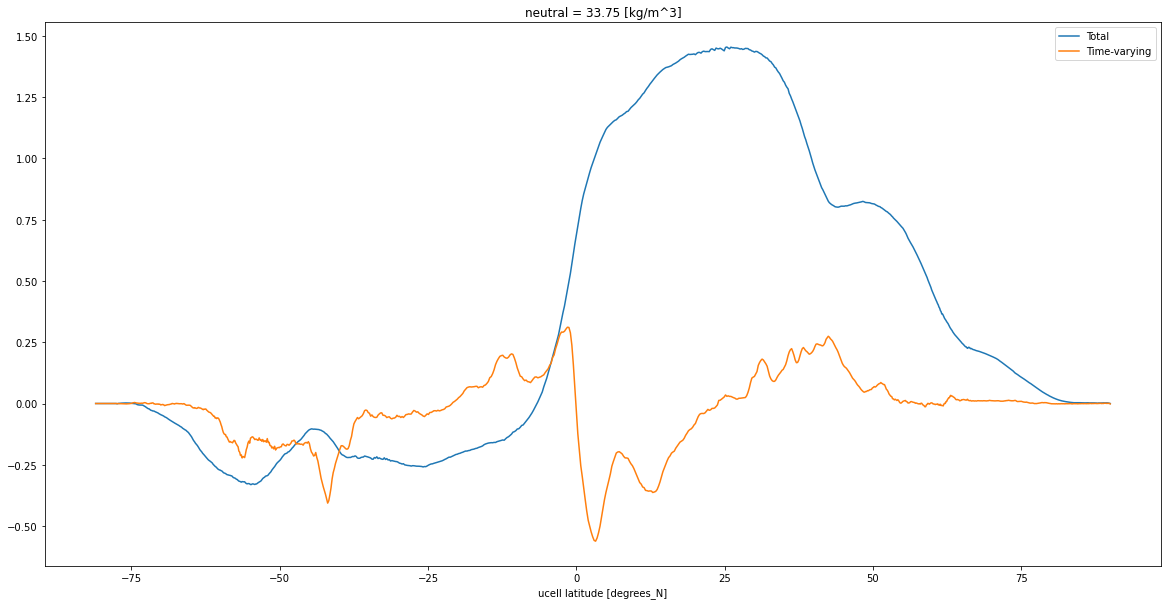

In [11]:
plt.figure(figsize = (20,10))
(Hf.sum('grid_xt_ocean')/1.e15).isel(neutral=-1).plot(label = 'Total')
a = (Hf.sum('grid_xt_ocean')/1.e15).isel(neutral=-1)
print(a.sel(grid_yu_ocean = -3, method = 'nearest').values)
print(a.sel(grid_yu_ocean = 3, method = 'nearest').values)

((Hf-Hf_mean_tot).sum('grid_xt_ocean')/1.e15).isel(neutral=-1).plot(label = 'Time-varying')

a = ((Hf-Hf_mean_tot).sum('grid_xt_ocean')/1.e15).isel(neutral=-1)
print(a.sel(grid_yu_ocean = -3, method = 'nearest').values)
print(a.sel(grid_yu_ocean = 3, method = 'nearest').values)

plt.legend()

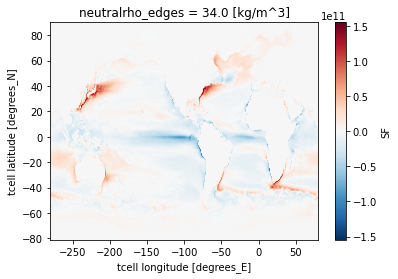

In [12]:
SF.isel(neutralrho_edges=-1).plot()

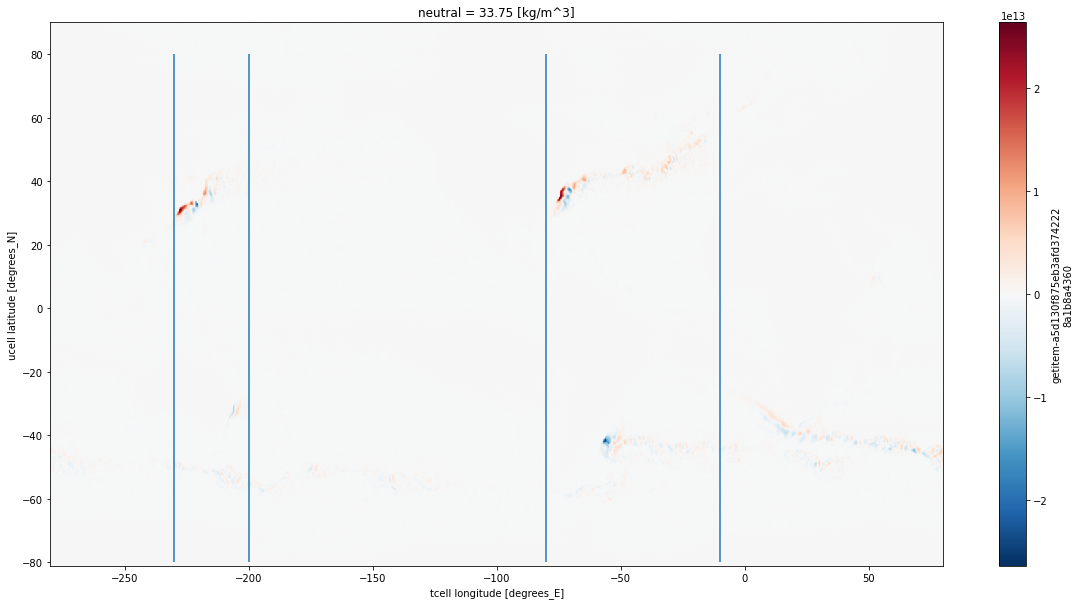

In [13]:
plt.figure(figsize = (20,10))
Hf_lt.isel(neutral=-1).plot()
plt.vlines([-230,-200,-80,-10],-80,80)

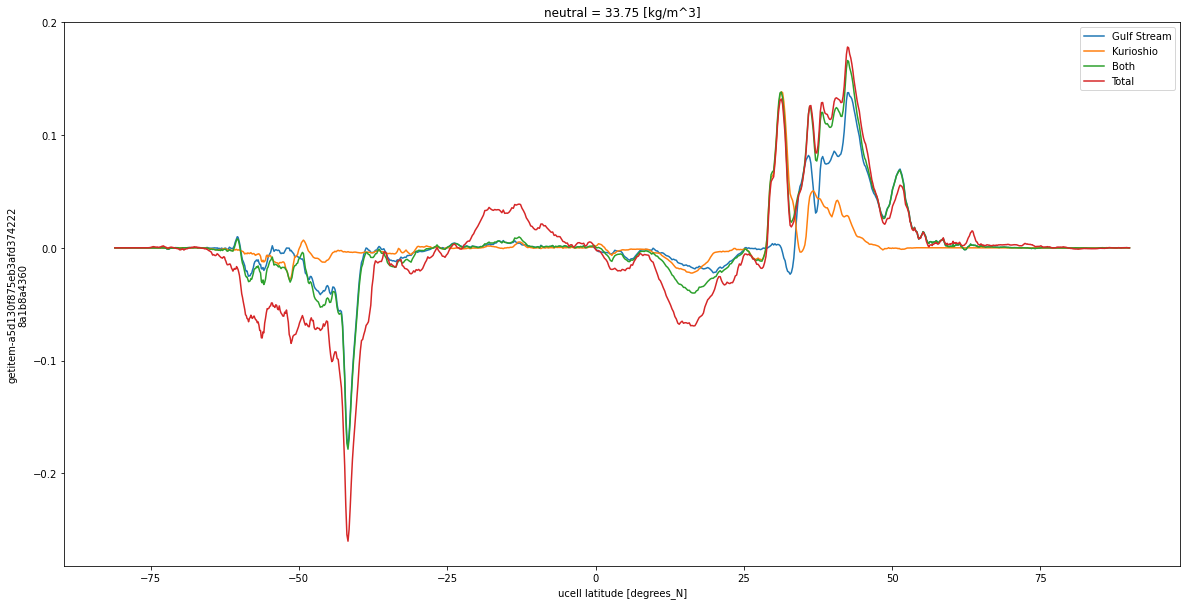

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


1.0083495937356073


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


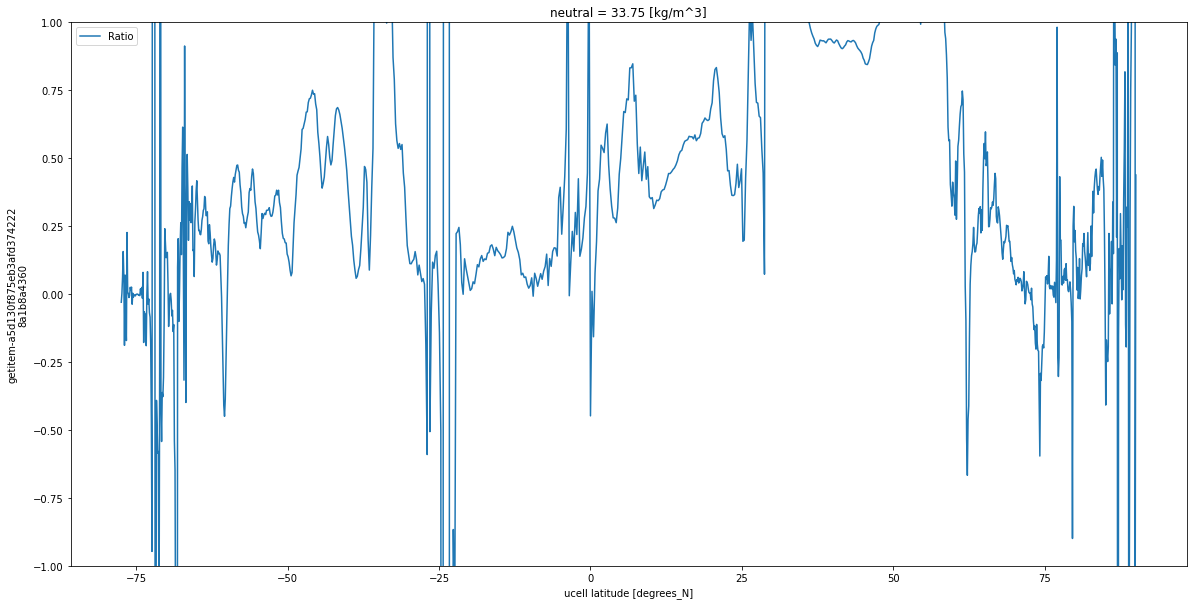

In [14]:
lat_range_GS = slice(-80,-10)
lat_range_K = slice(-230,-200)

plt.figure(figsize = (20,10))
(Hf_lt.sel(grid_xt_ocean = lat_range_GS).sum('grid_xt_ocean')/1.e15).isel(neutral=-1).plot(label = 'Gulf Stream')
(Hf_lt.sel(grid_xt_ocean = lat_range_K).sum('grid_xt_ocean')/1.e15).isel(neutral=-1).plot(label = 'Kurioshio')
a = (Hf_lt.sel(grid_xt_ocean = lat_range_K).sum('grid_xt_ocean')+Hf_lt.sel(grid_xt_ocean = lat_range_GS).sum('grid_xt_ocean'))
(a/1.e15).isel(neutral=-1).plot(label = 'Both')

(Hf_lt.sum('grid_xt_ocean')/1.e15).isel(neutral=-1).plot(label = 'Total')


plt.legend()
plt.show()

plt.figure(figsize = (20,10))
(a/Hf_lt.sum('grid_xt_ocean')).isel(neutral=-1).plot(label = 'Ratio')
print((a/Hf_lt.sum('grid_xt_ocean')).isel(neutral=-1).sel(grid_yu_ocean = slice(30,50)).mean().values)
plt.ylim(-1,1)
plt.legend()

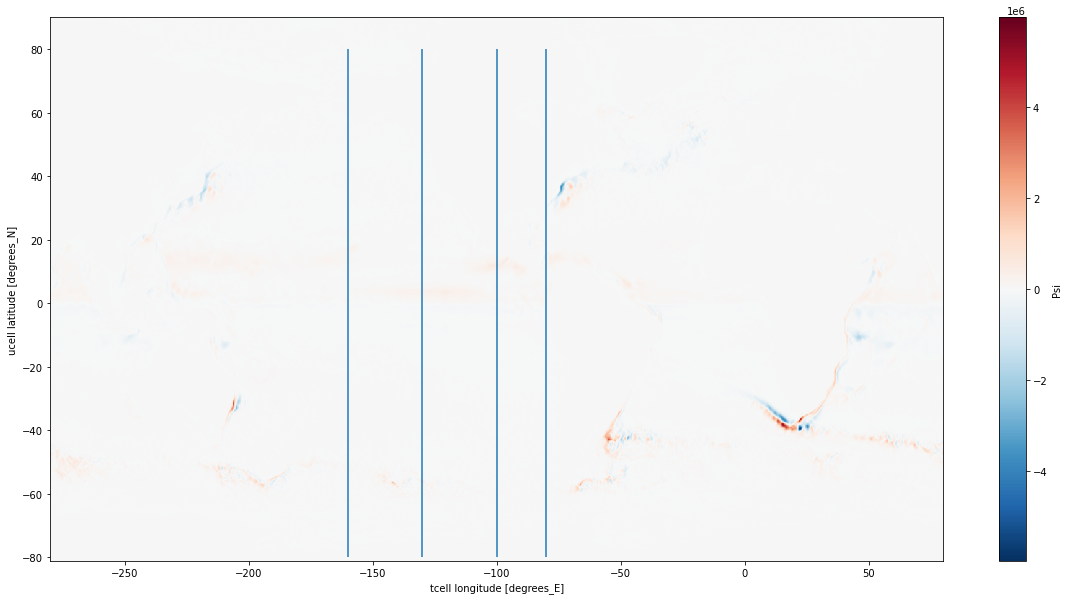

In [15]:
plt.figure(figsize = (20,10))
Psi_TIWs.sum('neutralrho_edges').plot()
plt.vlines([-160,-80,-130,-100],-80,80)

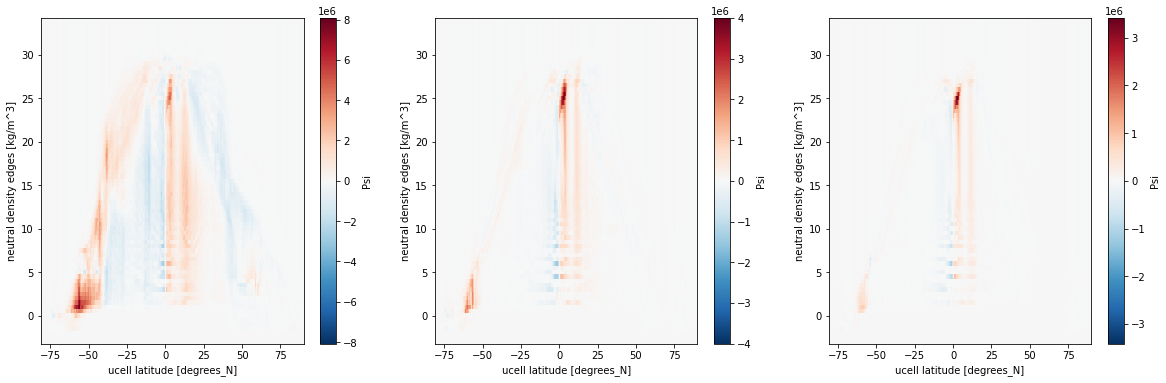

In [16]:
plt.figure(figsize = (20,6))

plt.subplot(1,3,1)
Psi_TIWs.sum('grid_xt_ocean').plot(x = 'grid_yu_ocean')
plt.subplot(1,3,2)
Psi_TIWs.sel(grid_xt_ocean = slice(-160,-80)).sum('grid_xt_ocean').plot(x = 'grid_yu_ocean')
plt.subplot(1,3,3)
Psi_TIWs.sel(grid_xt_ocean = slice(-130,-100)).sum('grid_xt_ocean').plot(x = 'grid_yu_ocean')



0.025695376702092782
-0.09576062013227232
0.10024198537154033
-0.2044374505338659
-0.03426375125217238
-0.1406508651508185
0.24360853532917628


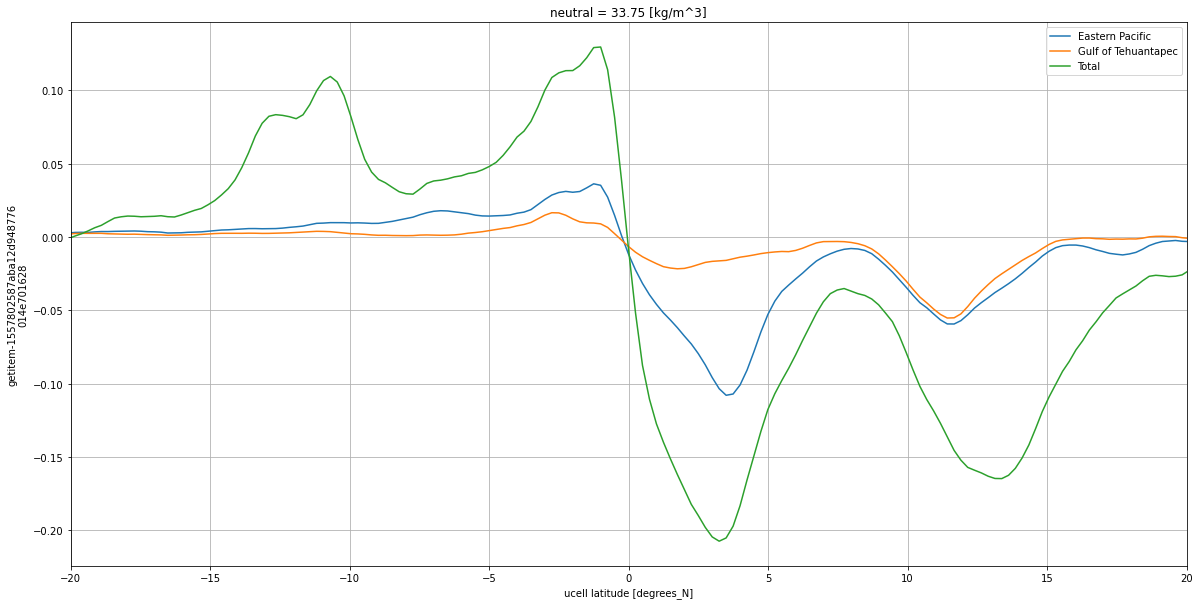

In [17]:
lat_range_TIWs = slice(-160,-80)
lat_range_GT = slice(-110,-80)

plt.figure(figsize = (20,10))
(Hf_TIWs.sel(grid_xt_ocean = lat_range_TIWs).sum('grid_xt_ocean')/1.e15).isel(neutral=-1).plot(label = 'Eastern Pacific')
(Hf_TIWs.sel(grid_xt_ocean = lat_range_GT).sum('grid_xt_ocean')/1.e15).isel(neutral=-1).plot(label = 'Gulf of Tehuantapec')

(Hf_TIWs.sum('grid_xt_ocean')/1.e15).isel(neutral=-1).plot(label = 'Total')


a = (Hf_TIWs.sel(grid_xt_ocean = lat_range_TIWs).sum('grid_xt_ocean')/1.e15).isel(neutral=-1)
print(a.sel(grid_yu_ocean = -3, method = 'nearest').values)
print(a.sel(grid_yu_ocean = 3, method = 'nearest').values)

a = (Hf_TIWs.sum('grid_xt_ocean')/1.e15).isel(neutral=-1)
print(a.sel(grid_yu_ocean = -3, method = 'nearest').values)
print(a.sel(grid_yu_ocean = 3, method = 'nearest').values)

a = (Hf_TIWs.sel(grid_xt_ocean = lat_range_GT).sum('grid_xt_ocean')/1.e15).isel(neutral=-1)
print(a.sel(grid_yu_ocean = slice(10,15)).mean('grid_yu_ocean').values)

b = (Hf_TIWs.sum('grid_xt_ocean')/1.e15).isel(neutral=-1)
print(b.sel(grid_yu_ocean = slice(10,15)).mean('grid_yu_ocean').values)

print(a.sel(grid_yu_ocean = slice(10,15)).mean('grid_yu_ocean').values/b.sel(grid_yu_ocean = slice(10,15)).mean('grid_yu_ocean').values)

plt.xlim(-20,20)
plt.legend()
plt.grid()

In [18]:
## Min temp
min_SST = xr.open_mfdataset('/g/data/e14/cy8964/Post_Process/temp/025deg_10yr_3d/min_SST_10yr_daily_data.nc').min_SST


In [19]:
min_SST = min_SST.min('xt_ocean').interp({'yt_ocean':Hf_TIWs.grid_yu_ocean})
min_SST = min_SST - 273.15

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/array/reductions.py:579: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/array/reductions.py:579: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/array/reductions.py:579: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)


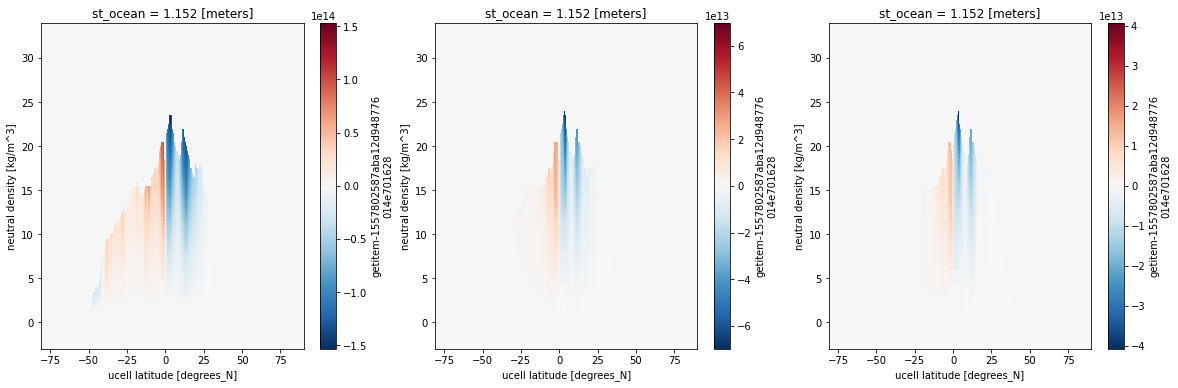

In [20]:
plt.figure(figsize = (20,6))

plt.subplot(1,3,1)
Hf_TIWs.where(Hf_TIWs.neutral < min_SST).sum('grid_xt_ocean').plot(x = 'grid_yu_ocean')
plt.subplot(1,3,2)
Hf_TIWs.where(Hf_TIWs.neutral < min_SST).sel(grid_xt_ocean = slice(-160,-80)).sum('grid_xt_ocean').plot(x = 'grid_yu_ocean')
plt.subplot(1,3,3)
Hf_TIWs.where(Hf_TIWs.neutral < min_SST).sel(grid_xt_ocean = slice(-130,-100)).sum('grid_xt_ocean').plot(x = 'grid_yu_ocean')



In [21]:
min_deep = Hf_TIWs.where(Hf_TIWs.neutral < min_SST).sum('grid_xt_ocean').min()
print(min_deep.values/1e15)
lat = Hf_TIWs.where(Hf_TIWs.neutral < min_SST).sum('grid_xt_ocean').min('neutral').idxmin()
min_surf = Hf_TIWs.sum('grid_xt_ocean').isel(neutral = -1).sel(grid_yu_ocean = lat)
print(min_surf.values/1e15)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/array/reductions.py:579: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)


-0.15336624057938764
-0.205122021949222


In [22]:
lat.values

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/array/reductions.py:579: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)


array(3.49782804)

0.7756483415971546


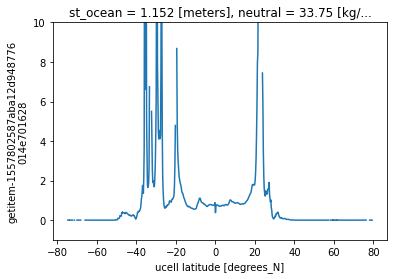

In [23]:
abs_bottom_HT = np.abs(Hf_TIWs.where(Hf_TIWs.neutral < min_SST).sum('grid_xt_ocean')).max('neutral')
(abs_bottom_HT/np.abs((Hf_TIWs.sum('grid_xt_ocean').isel(neutral = -1)).where(np.abs(Hf_TIWs.sum('grid_xt_ocean').isel(neutral = -1))>1e12))).plot()
plt.ylim(-1,10)
print((abs_bottom_HT/np.abs((Hf_TIWs.sum('grid_xt_ocean').isel(neutral = -1)).where(np.abs(Hf_TIWs.sum('grid_xt_ocean').isel(neutral = -1))>1e12))).mean().values)


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/array/reductions.py:579: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)


0.4725655851390299


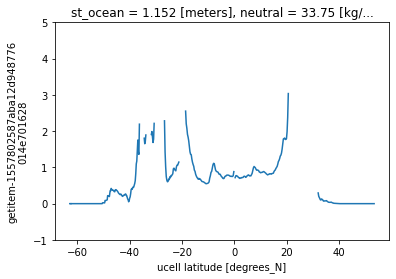

In [24]:
abs_bottom_HT = np.abs(Hf_TIWs.where(Hf_TIWs.neutral < min_SST).sum('grid_xt_ocean')).max('neutral')
(abs_bottom_HT/np.abs((Hf_TIWs.sum('grid_xt_ocean').isel(neutral = -1)).where(np.abs(Hf_TIWs.sum('grid_xt_ocean').isel(neutral = -1))>1e13))).plot()
plt.ylim(-1,5)
print((abs_bottom_HT/np.abs((Hf_TIWs.sum('grid_xt_ocean').isel(neutral = -1)).where(np.abs(Hf_TIWs.sum('grid_xt_ocean').isel(neutral = -1))>1e13))).mean().values)


0.7843846746642091


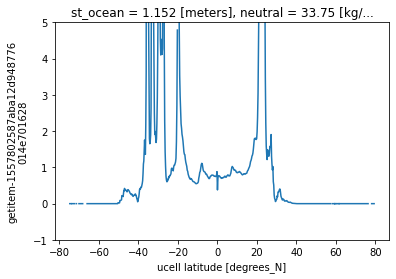

In [25]:
abs_bottom_HT = np.abs(Hf_TIWs.where(Hf_TIWs.neutral < min_SST).sum('grid_xt_ocean')).max('neutral')
(abs_bottom_HT/np.abs((Hf_TIWs.sum('grid_xt_ocean').isel(neutral = -1)).where(np.abs(Hf_TIWs.sum('grid_xt_ocean').isel(neutral = -1))>1e12))).plot()
plt.ylim(-1,5)
print((abs_bottom_HT/np.abs((Hf_TIWs.sum('grid_xt_ocean').isel(neutral = -1)).where(np.abs(Hf_TIWs.sum('grid_xt_ocean').isel(neutral = -1))>1e12))).sel(grid_yu_ocean = slice(-15,15)).mean().values)


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/array/reductions.py:579: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)


0.7843846746642091


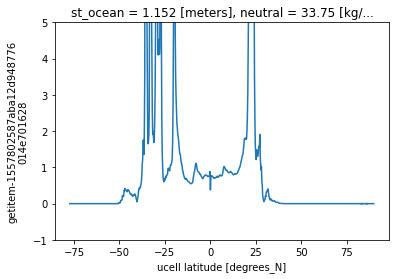

In [26]:
abs_bottom_HT = np.abs(Hf_TIWs.where(Hf_TIWs.neutral < min_SST).sum('grid_xt_ocean')).max('neutral')
(abs_bottom_HT/np.abs((Hf_TIWs.sum('grid_xt_ocean').isel(neutral = -1)).where(np.abs(Hf_TIWs.sum('grid_xt_ocean').isel(neutral = -1))>1e10))).plot()
plt.ylim(-1,5)
print((abs_bottom_HT/np.abs((Hf_TIWs.sum('grid_xt_ocean').isel(neutral = -1)).where(np.abs(Hf_TIWs.sum('grid_xt_ocean').isel(neutral = -1))>1e10))).sel(grid_yu_ocean = slice(-15,15)).mean().values)


0.6677093765817382
0.09337919203701431


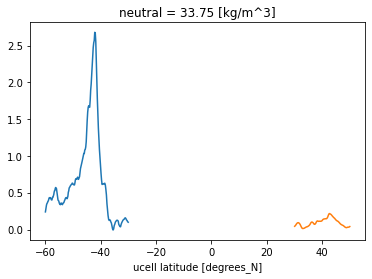

In [27]:
Hf_midlatS = ((Hf_TIWs+Hf_lt).sel(grid_yu_ocean = slice(-60,-30)).sum('grid_xt_ocean')/1.e15).isel(neutral=-1)
Hf_midlatN = ((Hf_lt).sel(grid_yu_ocean = slice(30,50)).sum('grid_xt_ocean')/1.e15).isel(neutral=-1)
Hf_totS = ((Hf).sel(grid_yu_ocean = slice(-60,-30)).sum('grid_xt_ocean')/1.e15).isel(neutral=-1)
Hf_totN = ((Hf).sel(grid_yu_ocean = slice(30,50)).sum('grid_xt_ocean')/1.e15).isel(neutral=-1)

(Hf_midlatS/Hf_totS).plot()
print((Hf_midlatS/Hf_totS).mean().values)
(Hf_midlatN/Hf_totN).plot()
print((Hf_midlatN/Hf_totN).mean().values)


# Diathermal HT


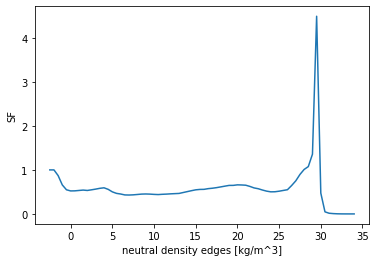

In [28]:
(np.abs(SF_DHT - SF_DHT_mean_tot)/np.abs(SF_DHT)).plot()

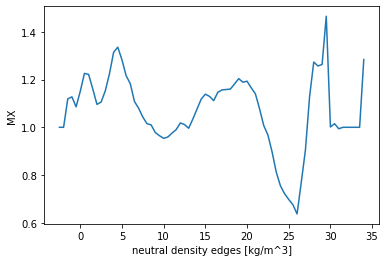

In [29]:
(np.abs(MX_DHT - MX_DHT_mean_tot)/np.abs(MX_DHT)).plot()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


0.1318179438719058
0.45285016859616767
0.029696251783511176
0.04998471819631836


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


0.02869405730795641
0.07137958000854833
0.06921316708215762


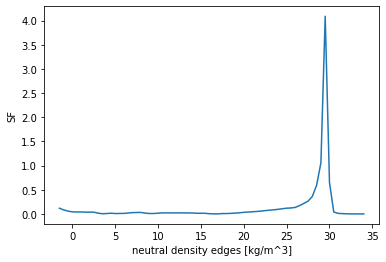

In [30]:
(np.abs(SF_DHT - SF_DHT_mean_tot - SF_DHT_ac)/np.abs(SF_DHT)).where(np.abs(SF_DHT) > 0.001).plot()
print((np.abs(SF_DHT - SF_DHT_mean_tot - SF_DHT_ac)/np.abs(SF_DHT)).where(np.abs(SF_DHT) > 0.001).mean().values)
print((np.abs(SF_DHT_ac)/np.abs(SF_DHT)).where(np.abs(SF_DHT) > 0.001).mean().values)
print((np.abs(SF_DHT_lt)/np.abs(SF_DHT)).where(np.abs(SF_DHT) > 0.001).mean().values)
print((np.abs(SF_DHT_TIWs)/np.abs(SF_DHT)).where(np.abs(SF_DHT) > 0.001).mean().values)
print((np.abs(SF_DHT_storm)/np.abs(SF_DHT)).where(np.abs(SF_DHT) > 0.001).mean().values)
print((np.abs(SF_DHT_diurnal)/np.abs(SF_DHT)).where(np.abs(SF_DHT) > 0.001).mean().values)
print((np.abs(SF_DHT - SF_DHT_mean_tot - SF_DHT_ac-SF_DHT_diurnal)/np.abs(SF_DHT)).where(np.abs(SF_DHT) > 0.001).mean().values)

0.1740701786104307
0.959757844925279
0.011469028508913121


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


0.05374970668944823
0.03186597023596291
0.14011727371681282
0.08922917626364954


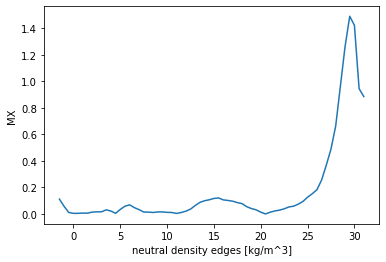

In [31]:
(np.abs(MX_DHT - MX_DHT_mean_tot - MX_DHT_ac)/np.abs(MX_DHT)).where(np.abs(MX_DHT) > 0.001).plot()
print((np.abs(MX_DHT - MX_DHT_mean_tot - MX_DHT_ac)/np.abs(MX_DHT)).where(np.abs(MX_DHT) > 0.001).mean().values)
print((np.abs(MX_DHT_ac)/np.abs(MX_DHT)).where(np.abs(MX_DHT) > 0.001).mean().values)
print((np.abs(MX_DHT_lt)/np.abs(MX_DHT)).where(np.abs(MX_DHT) > 0.001).mean().values)
print((np.abs(MX_DHT_TIWs)/np.abs(MX_DHT)).where(np.abs(MX_DHT) > 0.001).mean().values)
print((np.abs(MX_DHT_storm)/np.abs(MX_DHT)).where(np.abs(MX_DHT) > 0.001).mean().values)
print((np.abs(MX_DHT_diurnal)/np.abs(MX_DHT)).where(np.abs(MX_DHT) > 0.001).mean().values)
print((np.abs(MX_DHT - MX_DHT_mean_tot - MX_DHT_ac-MX_DHT_diurnal)/np.abs(MX_DHT)).where(np.abs(MX_DHT) > 0.001).mean().values)

In [32]:
print((np.abs(MX_DHT - MX_DHT_mean_tot - MX_DHT_ac-MX_DHT_diurnal)/np.abs(MX_DHT)).where(np.abs(MX_DHT) > 0.01).mean().values)
print((np.abs(SF_DHT - SF_DHT_mean_tot - SF_DHT_ac-SF_DHT_diurnal)/np.abs(SF_DHT)).where(np.abs(SF_DHT) > 0.01).mean().values)

0.0870564153266532
0.06921316708215762


In [33]:
print((np.abs(MX_DHT - MX_DHT_mean_tot - MX_DHT_ac-MX_DHT_diurnal)/np.abs(MX_DHT)).where(np.abs(MX_DHT) > 0.01).sel(neutralrho_edges = slice(-3,30)).mean().values)
print((np.abs(SF_DHT - SF_DHT_mean_tot - SF_DHT_ac-SF_DHT_diurnal)/np.abs(SF_DHT)).where(np.abs(SF_DHT) > 0.01).sel(neutralrho_edges = slice(-3,30)).mean().values)


0.08705641532665319
0.07757928470006259


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


0.35600905676567957
0.009877796388705604


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


0.027692208308918827
0.1269236000091892


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


0.1116350312782444
0.11084673704903103


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


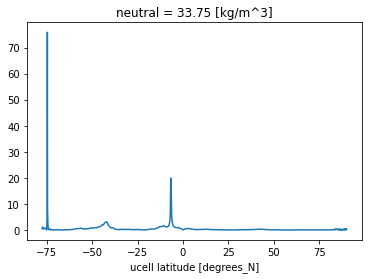

In [34]:
(np.abs(MHT - MHT_mean_tot)/np.abs(MHT)).plot()
print((np.abs(MHT - MHT_mean_tot)/np.abs(MHT)).where(np.abs(MHT) > 0.001).mean().values)
print((np.abs(MHT_diurnal)/np.abs(MHT)).where(np.abs(MHT) > 0.001).mean().values)
print((np.abs(MHT_storm)/np.abs(MHT)).where(np.abs(MHT) > 0.001).mean().values)
print((np.abs(MHT_TIWs)/np.abs(MHT)).where(np.abs(MHT) > 0.001).mean().values)
print((np.abs(MHT_lt)/np.abs(MHT)).where(np.abs(MHT) > 0.001).mean().values)
print((np.abs(MHT_ac)/np.abs(MHT)).where(np.abs(MHT) > 0.001).mean().values)


## Do ratio afterwards??

0.12484594634775067
1.0644072113979848


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


0.07492803038279125
0.07497911391744064


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


0.02896815955250863
0.06830277326936844


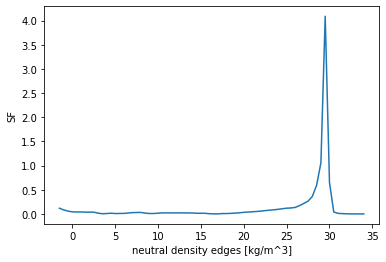

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


0.5475493840758059
4.6543060300330525
0.05291126689656832
0.24378999725193234
0.10365810476493897
0.48741099515540687


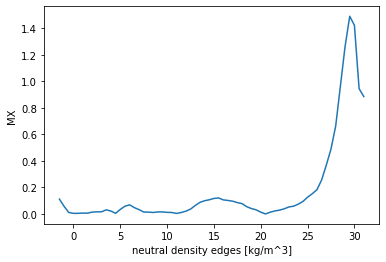

3.6546394868206242
0.11609876392223335
0.25184776780557416
1.2011094369039952
1.2277672713048502
1.0935985757383682


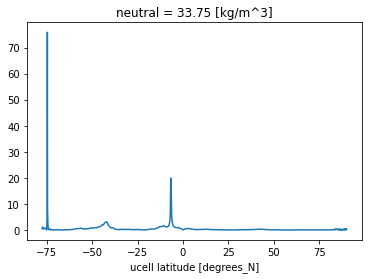

In [35]:
(np.abs(SF_DHT - SF_DHT_mean_tot - SF_DHT_ac)/np.abs(SF_DHT)).where(np.abs(SF_DHT) > 0.001).plot()
print((np.abs(SF_DHT - SF_DHT_mean_tot - SF_DHT_ac).mean()/np.abs(SF_DHT)).where(np.abs(SF_DHT) > 0.001).mean().values)
print((np.abs(SF_DHT_ac).mean()/np.abs(SF_DHT)).where(np.abs(SF_DHT) > 0.001).mean().values)
print((np.abs(SF_DHT_lt).mean()/np.abs(SF_DHT)).where(np.abs(SF_DHT) > 0.001).mean().values)
print((np.abs(SF_DHT_TIWs).mean()/np.abs(SF_DHT)).where(np.abs(SF_DHT) > 0.001).mean().values)
print((np.abs(SF_DHT_storm).mean()/np.abs(SF_DHT)).where(np.abs(SF_DHT) > 0.001).mean().values)
print((np.abs(SF_DHT_diurnal).mean()/np.abs(SF_DHT)).where(np.abs(SF_DHT) > 0.001).mean().values)
plt.show()

(np.abs(MX_DHT - MX_DHT_mean_tot - MX_DHT_ac)/np.abs(MX_DHT)).where(np.abs(MX_DHT) > 0.001).plot()
print((np.abs(MX_DHT - MX_DHT_mean_tot - MX_DHT_ac).mean()/np.abs(MX_DHT)).where(np.abs(MX_DHT) > 0.001).mean().values)
print((np.abs(MX_DHT_ac).mean()/np.abs(MX_DHT)).where(np.abs(MX_DHT) > 0.001).mean().values)
print((np.abs(MX_DHT_lt).mean()/np.abs(MX_DHT)).where(np.abs(MX_DHT) > 0.001).mean().values)
print((np.abs(MX_DHT_TIWs).mean()/np.abs(MX_DHT)).where(np.abs(MX_DHT) > 0.001).mean().values)
print((np.abs(MX_DHT_storm).mean()/np.abs(MX_DHT)).where(np.abs(MX_DHT) > 0.001).mean().values)
print((np.abs(MX_DHT_diurnal).mean()/np.abs(MX_DHT)).where(np.abs(MX_DHT) > 0.001).mean().values)
plt.show()

(np.abs(MHT - MHT_mean_tot)/np.abs(MHT)).plot()
print((np.abs(MHT - MHT_mean_tot).mean()/np.abs(MHT)).where(np.abs(MHT) > 0.001).mean().values)
print((np.abs(MHT_diurnal).mean()/np.abs(MHT)).where(np.abs(MHT) > 0.001).mean().values)
print((np.abs(MHT_storm).mean()/np.abs(MHT)).where(np.abs(MHT) > 0.001).mean().values)
print((np.abs(MHT_TIWs).mean()/np.abs(MHT)).where(np.abs(MHT) > 0.001).mean().values)
print((np.abs(MHT_lt).mean()/np.abs(MHT)).where(np.abs(MHT) > 0.001).mean().values)
print((np.abs(MHT_ac).mean()/np.abs(MHT)).where(np.abs(MHT) > 0.001).mean().values)
plt.show()
